In [1]:
#Boston Home IQ: Price Prediction Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [8]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
df['rm'].fillna(df['rm'].mean(), inplace=True)


C:\Users\yash\AppData\Local\Temp\ipykernel_1656\1273402923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


In [11]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

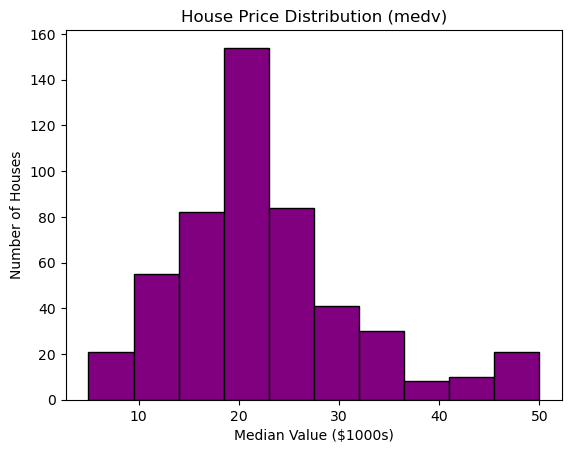

In [13]:
##hist

plt.hist(df['medv'], bins=10, color='purple', edgecolor='black')
plt.title('House Price Distribution (medv)')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Number of Houses')
plt.show()


In [14]:
# Most houses are priced between $15k–$25k.

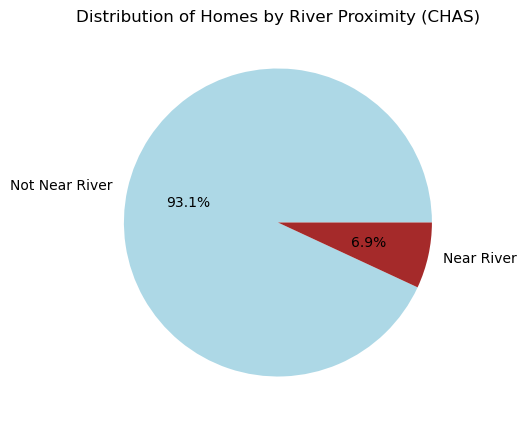

In [15]:
#pie chart
chas_counts = df['chas'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(chas_counts, labels=['Not Near River', 'Near River'], autopct='%1.1f%%', colors=['lightblue', 'brown'])
plt.title('Distribution of Homes by River Proximity (CHAS)')
plt.show()

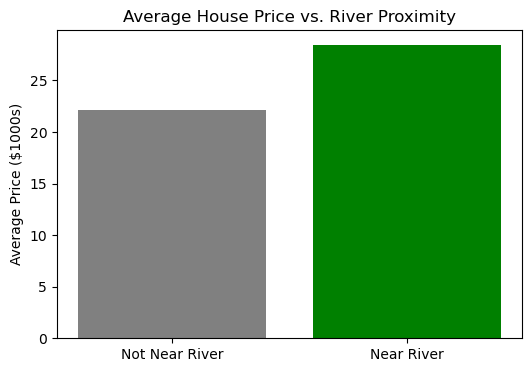

In [16]:
#bar graph
avg_price_by_river = df.groupby('chas')['medv'].mean()
plt.figure(figsize=(6, 4))
plt.bar(['Not Near River', 'Near River'], avg_price_by_river, color=['gray', 'green'])
plt.title('Average House Price vs. River Proximity')
plt.ylabel('Average Price ($1000s)')
plt.show()

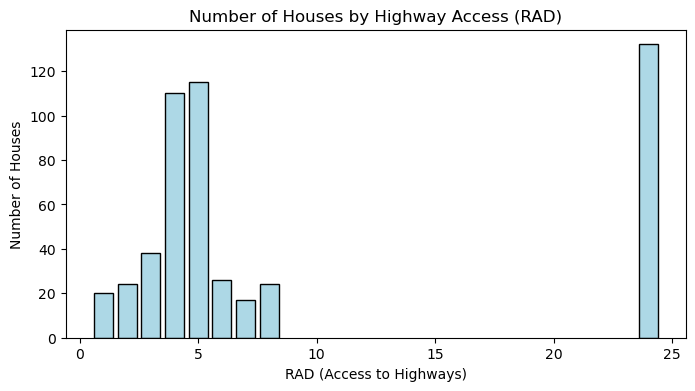

In [17]:
#bar graph
rad_counts = df['rad'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(rad_counts.index, rad_counts.values, color='lightblue', edgecolor='black')
plt.title('Number of Houses by Highway Access (RAD)')
plt.xlabel('RAD (Access to Highways)')
plt.ylabel('Number of Houses')
plt.show()

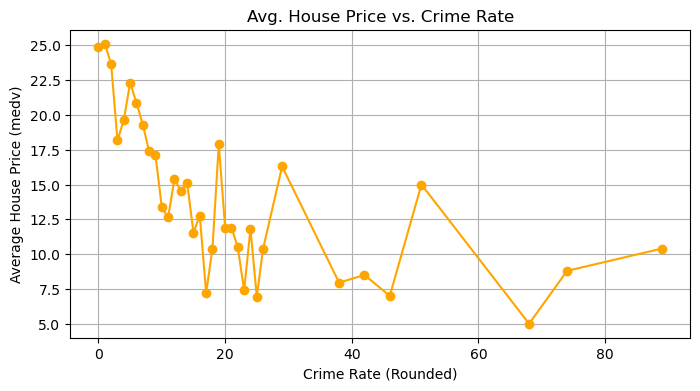

In [18]:
#liine graph
df['crim_rounded'] = df['crim'].round()  ## here round is to round-off values (eg:4.8=5)
avg_price_by_crim = df.groupby('crim_rounded')['medv'].mean()
plt.figure(figsize=(8, 4))
plt.plot(avg_price_by_crim.index, avg_price_by_crim.values, color='orange', marker='o')
plt.title('Avg. House Price vs. Crime Rate')
plt.xlabel('Crime Rate (Rounded)')
plt.ylabel('Average House Price (medv)')
plt.grid(True)
plt.show()

In [19]:
df.corr(numeric_only=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_rounded
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.999664
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.198792
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.405769
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.056535
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.423124
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375,-0.216155
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.353536
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.380543
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.628311
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.584669


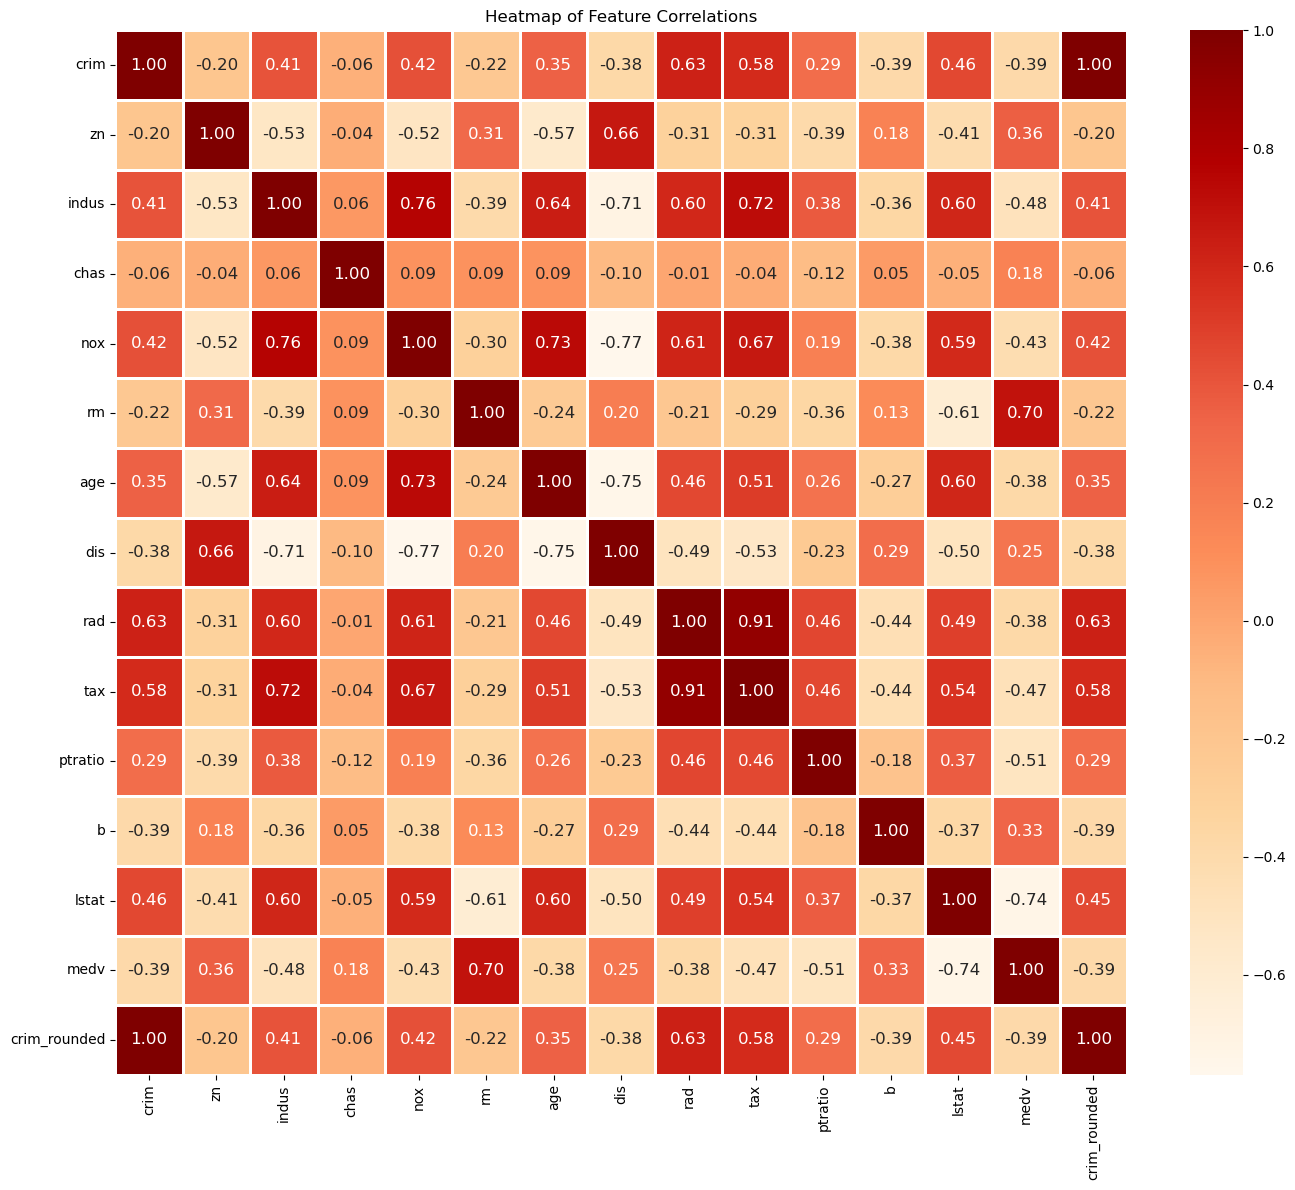

In [20]:
#heatmap
plt.figure(figsize=(14, 12)) 
sns.heatmap(
    df.corr(), 
    cmap='OrRd',         # Warm color map
    annot=True,          # Show correlation values
    fmt=".2f",           # Format decimal places
    linewidths=1,        # Thicker lines between boxes
    cbar=True,           # Show color bar
    annot_kws={"size": 12}  # Increase font size inside boxes
)
plt.title('Heatmap of Feature Correlations')
plt.tight_layout() # automatically adjusts the spacing between0 elements in a plot.
plt.show()

In [21]:
# +1 (dark red/orange)==perfect positive correlation(tax and rad)around o.91
# -1(light colors/cool colors)==negative correlation (lstat and medv) around  -0.74
# 0 (lighter color)==no correlation


<Figure size 500x500 with 0 Axes>

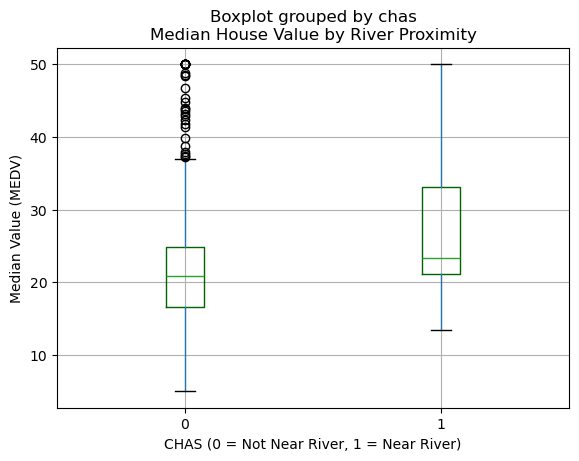

In [43]:
#boxplot
plt.figure(figsize=(5, 5))
df.boxplot(column='medv', by='chas', grid=True, boxprops=dict(color='darkgreen'))
plt.title('Median House Value by River Proximity')

plt.xlabel('CHAS (0 = Not Near River, 1 = Near River)')
plt.ylabel('Median Value (MEDV)')
plt.show()


In [23]:
#Machine learning models implementations

In [24]:
#train_test_split()
#train_test_split() is used to divide your dataset into two parts:
#1. Training Set
# 2. Testing Set


import pandas as pd
from sklearn.model_selection import train_test_split #Imports a function from Scikit-learn to split your data into training and testing sets.

X = df.drop('medv', axis=1)#Removes the 'medv' column from the DataFrame to keep only the input features (like crime, rooms, tax, etc.).
                            #These will be used to predict the house price.

y = df['medv'] #Stores the target/output variable — the median home value — which you want the model to predict.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#X_train: features for training (60% of the data)
#X_test: features for testing (40% of the data)        # test size 0.4 =Means 40% of the data is used for testing, 60% for training.
#y_train: target prices for training                    # random state =42 Keeps the split consistent every time you run the code.
#y_test: target prices for testing                            


In [25]:
print(X_train)

         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
304   0.05515  33.0   2.18     0  0.472  7.236  41.1  4.0220    7  222   
83    0.03551  25.0   4.86     0  0.426  6.167  46.7  5.4007    4  281   
248   0.16439  22.0   5.86     0  0.431  6.433  49.1  7.8265    7  330   
165   2.92400   0.0  19.58     0  0.605  6.101  93.0  2.2834    5  403   
163   1.51902   0.0  19.58     1  0.605  8.375  93.9  2.1620    5  403   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.520  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.464  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.740  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.520  6.405  85.4  2.7147    5  384   

     ptratio       b  lstat  crim_rounded  
304     18.4  393.68   6.93           0.0  
83      19.0  390.64   

In [26]:
#this line prints the training data features 


In [27]:
print(X_test)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
173   0.09178   0.0   4.05     0  0.510  6.416   84.1  2.6463    5  296   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10     0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
420  11.08740   0.0  18.10     0  0.718  6.411  100.0  1.8589   24  666   
145   2.37934   0.0  19.58     0  0.871  6.130  100.0  1.4191    5  403   
92    0.04203  28.0  15.04     0  0.464  6.442   53.6  3.6659    4  270   
152   1.12658   0.0  19.58     1  0.871  5.012   88.0  1.6102    5  403   
222   0.62356   0.0   6.20     1  0.507  6.879   77.7  3.2721    8  307   

     ptratio       b  lstat  crim_rounded  
173     16.6  395.50   9.04           0.0  
274     17.

In [28]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
420    16.7
145    13.8
92     22.9
152    15.3
222    27.5
Name: medv, Length: 203, dtype: float64


In [29]:
print(y_train)

304    36.1
83     22.9
248    24.5
165    25.0
163    50.0
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 303, dtype: float64


In [30]:
#LINEAR REGRESSION
#Linear Regression is a simple machine learning algorithm that finds the best straight line to predict one variable based on another.

from sklearn.linear_model import LinearRegression #LinearRegression: The ML model used to predict numeric values.
from sklearn.metrics import r2_score    #r2_score: A metric that tells how well your model predicts the data


model = LinearRegression() #Creates a Linear Regression model object.
model.fit(X_train, y_train)#fit() trains the model using the training features (X_train) and actual prices (y_train).


y_pred = model.predict(X_test)#Uses the trained model to predict house prices based on the test data (X_test).
#Stores the predictions in y_pred.



r2 = r2_score(y_test, y_pred) #Compares predicted values (y_pred) with actual values (y_test).
print("R² Score (Linear Regression Accuracy):", r2)


R² Score (Linear Regression Accuracy): 0.7130868985958356


In [31]:
#DECISION TREE REGRESSON
#Decision Tree Regression breaks the data into smaller parts based on rules and gives predictions by taking the average value in each part.

from sklearn.tree import DecisionTreeRegressor#DecisionTreeRegressor: A machine learning model that makes predictions by learning rules from the data.
from sklearn.metrics import r2_score #r2_score: Measures how well your model predicts

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train) # trains the model using your input features (X_train) and correct house prices (y_train).


y_pred = model.predict(X_test) #Uses the trained model to predict house prices for the test data (X_test).

r2 = r2_score(y_test, y_pred)#Compares the predicted values with actual ones 
print("R² Score (Decision Tree Regressor):", r2)#R² Score tells how accurate your model is.

R² Score (Decision Tree Regressor): 0.7261176665285833


In [32]:
#RANDOM FOREST REGRESSOR
#Random Forest Regression uses many decision trees to make predictions and takes the average of their results.

from sklearn.ensemble import RandomForestRegressor#RandomForestRegressor: An ensemble model that builds many decision trees and combines their results.
from sklearn.metrics import r2_score


model = RandomForestRegressor(n_estimators=100, random_state=42)
#n_estimators=100: Builds 100 decision trees and averages their predictions for better accuracy and stability.
#random_state=42: Ensures results are the same every time

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R² Score (Random Forest Regressor):", r2)


R² Score (Random Forest Regressor): 0.8655955944315531


In [33]:
# CLASSIFICATION LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



y = df['medv'].apply(lambda x: 1 if x >= 20 else 0) ##Creates a new target (y) where: PRICE OF AN HOUSE 
                                                      #is a lambda function
                                                     # If price (medv) ≥ 20 → label 1 (high)  1 = High price (≥ $20,000)
                                                          # #Else → label 0 (low)  0 = Low price (< $20,000)
#.apply() is used to apply a function to each row or column in a df

X = df.drop('medv', axis=1) #All columns except 'medv' will be used to predict the class.


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42) # X, y, test_size=0.4, random_state=42


model = LogisticRegression(max_iter=1000)  #max_iter=1000 increases the number of training steps
model.fit(X_train, y_train)


y_pred = model.predict(X_test) #Predicts whether the house price is high (1) or low (0).


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8669950738916257

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        96
           1       0.87      0.88      0.87       107

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



C:\Users\yash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
